# Important Libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import set_config
set_config(transform_output = "pandas")

# Function to Save Figures

In [2]:
from pathlib import Path
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Loading the Titanic Dataset

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# EDA and Pre-processing

In [5]:
print('Shape of the dataset', titanic.shape)
duplicateRows = titanic[titanic.duplicated()]
print('Duplicate Rows: ')
duplicateRows


Shape of the dataset (891, 15)
Duplicate Rows: 


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
print('Number of null entries ', titanic.isnull().sum().sum())

Number of null entries  869


In [7]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
for f in titanic.columns:
    unique_vals = titanic[f].unique()
    if(len(unique_vals) <= 10):
        print('Column ', f, ' has ', len(unique_vals), ' unique values -->', unique_vals)
    else:
        print('Column ', f, ' has ', len(unique_vals), ' unique values')

Column  survived  has  2  unique values --> [0 1]
Column  pclass  has  3  unique values --> [3 1 2]
Column  sex  has  2  unique values --> ['male' 'female']
Column  age  has  89  unique values
Column  sibsp  has  7  unique values --> [1 0 3 4 2 5 8]
Column  parch  has  7  unique values --> [0 1 2 5 3 4 6]
Column  fare  has  248  unique values
Column  embarked  has  4  unique values --> ['S' 'C' 'Q' nan]
Column  class  has  3  unique values --> ['Third', 'First', 'Second']
Categories (3, object): ['Third', 'First', 'Second']
Column  who  has  3  unique values --> ['man' 'woman' 'child']
Column  adult_male  has  2  unique values --> [ True False]
Column  deck  has  8  unique values --> [NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['C', 'E', 'G', 'D', 'A', 'B', 'F']
Column  embark_town  has  4  unique values --> ['Southampton' 'Cherbourg' 'Queenstown' nan]
Column  alive  has  2  unique values --> ['no' 'yes']
Column  alone  has  2  unique values --> [False  True]


# Data Pre-Processing Strategies

1. Drop Duplicates
2. Use Simple Imputer 
3. MinMax Scale ---> pclass, age, sibsp, parch, fare
4. class ---> Replace 'First' by 1, 'Second' by 2 and 'Third' by 3
5. adult_male, alone --> Replace 'True' by 1 and 'False' by 0
6. OneHotEncoder --> 'sex', 'embarked', 'who', 'deck', 'embark_town'

In [10]:
titanic.drop_duplicates(inplace = True)

In [11]:
titanic.shape

(784, 15)

In [12]:
titanic['adult_male'].replace({'True': 1, 'False':0}, inplace = True)
titanic['alone'].replace({'True': 1, 'False':0}, inplace = True)
titanic['class'].replace({'First': 1, 'Second':2, 'Third': 3}, inplace = True)

In [13]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,3,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,1,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,3,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,1,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,3,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,3,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,1,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,3,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,3,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,2,child,False,NaN,Cherbourg,yes,False


In [14]:
titanic.shape

(784, 15)

In [15]:
titanic['survived'].value_counts()

0    461
1    323
Name: survived, dtype: int64

In [16]:
titanic.drop(columns = 'deck', inplace = True)
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,3,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,1,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,3,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,1,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,3,man,True,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,3,man,True,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,1,man,True,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,3,child,False,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,3,woman,False,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,2,child,False,Cherbourg,yes,False


In [17]:
from sklearn.model_selection import train_test_split

y = titanic['survived']
X = titanic.drop(columns = 'survived')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, 
                                                    test_size = 0.2)

In [18]:
X_train.head(10)

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
287,3,male,22.0,0,0,7.8958,S,3,man,True,Southampton,no,True
655,2,male,24.0,2,0,73.5000,S,2,man,True,Southampton,no,False
463,2,male,48.0,0,0,13.0000,S,2,man,True,Southampton,no,True
699,3,male,42.0,0,0,7.6500,S,3,man,True,Southampton,no,True
64,1,male,NaN,0,0,27.7208,C,1,man,True,Cherbourg,no,True
657,3,female,32.0,1,1,15.5000,Q,3,woman,False,Queenstown,no,False
334,1,female,NaN,1,0,133.6500,S,1,woman,False,Southampton,yes,False
534,3,female,30.0,0,0,8.6625,S,3,woman,False,Southampton,no,True
30,1,male,40.0,0,0,27.7208,C,1,man,True,Cherbourg,no,True
624,3,male,21.0,0,0,16.1000,S,3,man,True,Southampton,no,True


In [19]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
columns_to_scale = ['pclass', 'age', 'sibsp', 'parch', 'fare']
columns_to_encode = ['sex', 'embarked', 'who', 'embark_town']

scale_pipe = Pipeline([
                        ('scale', MinMaxScaler()),
    
                     ])

encode_pipe = Pipeline([
                         ('encode', OneHotEncoder(sparse = False) )
                      ])

ct = ColumnTransformer([
                        ('scaling', scale_pipe, columns_to_scale),
                        ('encoding', encode_pipe, columns_to_encode),
    
                      ])

In [20]:
ct

ColumnTransformer(transformers=[('scaling',
                                 Pipeline(steps=[('scale', MinMaxScaler())]),
                                 ['pclass', 'age', 'sibsp', 'parch', 'fare']),
                                ('encoding',
                                 Pipeline(steps=[('encode',
                                                  OneHotEncoder(sparse=False))]),
                                 ['sex', 'embarked', 'who', 'embark_town'])])

In [21]:
X_train.head(10)

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
287,3,male,22.0,0,0,7.8958,S,3,man,True,Southampton,no,True
655,2,male,24.0,2,0,73.5000,S,2,man,True,Southampton,no,False
463,2,male,48.0,0,0,13.0000,S,2,man,True,Southampton,no,True
699,3,male,42.0,0,0,7.6500,S,3,man,True,Southampton,no,True
64,1,male,NaN,0,0,27.7208,C,1,man,True,Cherbourg,no,True
657,3,female,32.0,1,1,15.5000,Q,3,woman,False,Queenstown,no,False
334,1,female,NaN,1,0,133.6500,S,1,woman,False,Southampton,yes,False
534,3,female,30.0,0,0,8.6625,S,3,woman,False,Southampton,no,True
30,1,male,40.0,0,0,27.7208,C,1,man,True,Cherbourg,no,True
624,3,male,21.0,0,0,16.1000,S,3,man,True,Southampton,no,True


In [22]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
X_train

,scaling__pclass,scaling__age,scaling__sibsp,scaling__parch,scaling__fare,encoding__sex_female,encoding__sex_male,encoding__embarked_C,encoding__embarked_Q,encoding__embarked_S,encoding__embarked_nan,encoding__who_child,encoding__who_man,encoding__who_woman,encoding__embark_town_Cherbourg,encoding__embark_town_Queenstown,encoding__embark_town_Southampton,encoding__embark_town_nan
287,1.0,0.271174,0.000,0.0,0.015412,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
655,0.5,0.296306,0.250,0.0,0.143462,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
463,0.5,0.597889,0.000,0.0,0.025374,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
699,1.0,0.522493,0.000,0.0,0.014932,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
64,0.0,NaN,0.000,0.0,0.054107,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,0.5,0.736115,0.000,0.0,0.026350,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
237,0.5,0.095250,0.000,0.4,0.051237,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
288,0.5,0.522493,0.000,0.0,0.025374,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
530,0.5,0.019854,0.125,0.2,0.050749,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
X_test

,scaling__pclass,scaling__age,scaling__sibsp,scaling__parch,scaling__fare,encoding__sex_female,encoding__sex_male,encoding__embarked_C,encoding__embarked_Q,encoding__embarked_S,encoding__embarked_nan,encoding__who_child,encoding__who_man,encoding__who_woman,encoding__embark_town_Cherbourg,encoding__embark_town_Queenstown,encoding__embark_town_Southampton,encoding__embark_town_nan
785,1.0,0.308872,0.000,0.0,0.014151,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
385,0.5,0.220910,0.000,0.0,0.143462,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
528,1.0,0.484795,0.000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
14,1.0,0.170646,0.000,0.0,0.015330,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
151,0.0,0.271174,0.125,0.0,0.129995,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1.0,0.107816,0.500,0.4,0.061264,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
227,1.0,0.252325,0.000,0.0,0.014151,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
189,1.0,0.447097,0.000,0.0,0.015412,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
58,0.5,0.057552,0.125,0.4,0.054164,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(627, 18) (627,) (157, 18) (157,)


In [26]:
imp = SimpleImputer(strategy = 'median')
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)


# KNN Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [28]:
y_pred = knn.predict(X_test)

In [29]:
X_test

,scaling__pclass,scaling__age,scaling__sibsp,scaling__parch,scaling__fare,encoding__sex_female,encoding__sex_male,encoding__embarked_C,encoding__embarked_Q,encoding__embarked_S,encoding__embarked_nan,encoding__who_child,encoding__who_man,encoding__who_woman,encoding__embark_town_Cherbourg,encoding__embark_town_Queenstown,encoding__embark_town_Southampton,encoding__embark_town_nan
785,1.0,0.308872,0.000,0.0,0.014151,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
385,0.5,0.220910,0.000,0.0,0.143462,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
528,1.0,0.484795,0.000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
14,1.0,0.170646,0.000,0.0,0.015330,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
151,0.0,0.271174,0.125,0.0,0.129995,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1.0,0.107816,0.500,0.4,0.061264,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
227,1.0,0.252325,0.000,0.0,0.014151,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
189,1.0,0.447097,0.000,0.0,0.015412,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
58,0.5,0.057552,0.125,0.4,0.054164,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

,y_test,y_pred
785,0,0
385,0,0
528,0,0
14,0,1
151,1,1
...,...,...
182,0,1
227,0,0
189,0,0
58,1,1


In [31]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(y_test, y_pred ))

Test Accuracy  0.7961783439490446


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        96
           1       0.72      0.77      0.75        61

    accuracy                           0.80       157
   macro avg       0.79      0.79      0.79       157
weighted avg       0.80      0.80      0.80       157



In [33]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,78,18
1,14,47


In [34]:
print('Train Accuracy ', accuracy_score(y_train, knn.predict(X_train) ))

Train Accuracy  0.7878787878787878


In [35]:
print(classification_report(y_train, knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       365
           1       0.81      0.65      0.72       262

    accuracy                           0.79       627
   macro avg       0.79      0.77      0.77       627
weighted avg       0.79      0.79      0.78       627



# ROC curve

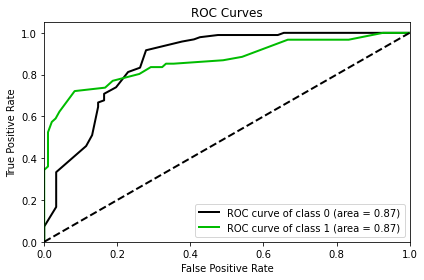

In [36]:
import scikitplot as skplt
y_probas = knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
save_fig('ROC Curve-KNN')
plt.show();


# Experimenting with different values of K

In [37]:
k = range(10, 30)
k

range(10, 30)

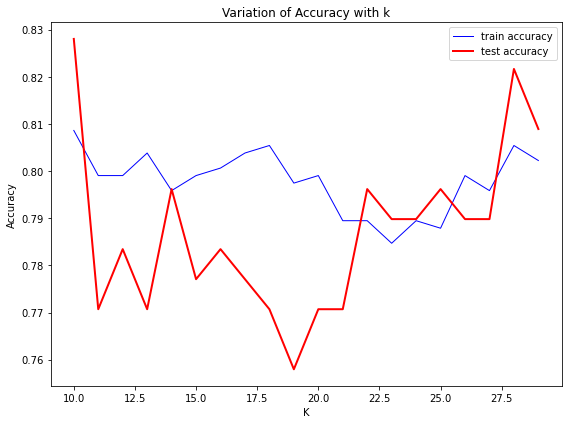

In [38]:
train_acc = []
test_acc = []
neighbors = []

for i in k:
    neighbors.append(i)
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize = (8,6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with k')
plt.plot(neighbors, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(neighbors, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against k')
plt.show();

In [39]:
pd.DataFrame({'K': neighbors, 'Train Acc': train_acc, 'Test Acc': test_acc})

,K,Train Acc,Test Acc
0,10,0.808612,0.828025
1,11,0.799043,0.770701
2,12,0.799043,0.783439
3,13,0.803828,0.770701
4,14,0.795853,0.796178
5,15,0.799043,0.777070
6,16,0.800638,0.783439
7,17,0.803828,0.777070
8,18,0.805423,0.770701
9,19,0.797448,0.757962


In [40]:
k = 28

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('Train Accuracy', accuracy_score(y_train, knn.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test, pred))

print(classification_report(y_test, pred))

Train Accuracy 0.8054226475279107
Test Accuracy 0.821656050955414
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        96
           1       0.79      0.74      0.76        61

    accuracy                           0.82       157
   macro avg       0.81      0.81      0.81       157
weighted avg       0.82      0.82      0.82       157

